In [42]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy import stats

np.random.seed(123)

from pydataset import data

# Proof of Concept - Central Limit Theorem

In [ ]:
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

In [4]:
# Create 2-d array of random numbers between 1 and 6 to represent ten dice rolls for each column

data = np.random.randint(1, 7, (nrows, ncols))

data[:4]

array([[1, 4, 6, 5, 4, 4, 2, 5, 5, 3],
       [2, 5, 2, 5, 3, 1, 2, 2, 3, 4],
       [1, 2, 1, 4, 6, 4, 3, 4, 5, 4],
       [4, 2, 3, 5, 1, 3, 6, 5, 5, 2]])

In [7]:
# Calculate the average for each set of 10 dice rolls

calculated_averages = data.mean(axis=1)
calculated_averages

array([3.9, 2.9, 3.4, 3.6, 3.2, 3.4, 2.9, 3.4, 3.8, 3. , 3.9, 3.8, 3.5,
       4.6, 3.3, 3.5, 4.7, 4.2, 2.7, 4.1, 2.6, 2.9, 4.3, 2.6, 2.2, 2.6,
       3.3, 4. , 3.6, 2.7, 2.6, 5. , 4.1, 3.7, 4.5, 3.3, 2.9, 3.2, 4. ,
       3.2, 2.9, 3.5, 3.9, 4.2, 3.5, 3. , 2.5, 3.8, 3.6, 3.1, 3.5, 4.6,
       3.5, 3.8, 3.1, 3.8, 3.8, 3.4, 3.2, 3.2, 3.6, 3.8, 3.3, 3.5, 3.2,
       4.2, 3.6, 3.3, 2.7, 3.9, 2.8, 3.7, 3.6, 2.9, 4.3, 3.8, 3.8, 4. ,
       3.4, 2.9, 4. , 3.8, 3.8, 3.1, 3.1, 3.2, 4.6, 3.7, 3.5, 4. , 4.5,
       3.9, 3.6, 2.4, 3.7, 2.6, 2.8, 2.8, 3.3, 4.4])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

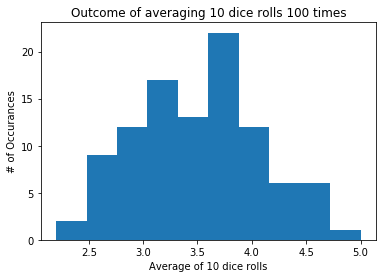

In [8]:
# Visualize the distribution of 100 observations of 10 dice rolls

plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')

## Hypothesis Testing

- one_tailed test looks for a specific difference

- two-tailed test looks for any difference

- confidence interval is a range of values, 90%, 95%, 99.5%, we set up before we begin testing. It states that we are n% sure that our statistic will fall within our set range.

- p-values are values we obtain from hypothesis testing. They represent the change that our obtained result is due to change considering our stated hypothesis to be true.

### Hypothesis Testing Errors

- Type I Error == False Positive
    - We predict there is a difference when in reality there is no difference
    - We reject the Null hypothesis when the Null hypothesis is actually True
    
- Type II Error == False Negative
    - We predict that there is no difference when in reality there is a difference.
    - We fail to reject the Null hypothesis when the Null hypothesis is actually false.

## T-test

- A type of inferential statistic used to determine if there is a significant difference between the means of two groups which may be related in certain features.


    - Compares a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups.
    
    
        - Examples: 
        
        Are sales for group A higher when we run a promotion? 
        Do customers who receive a promotion spend more money?
        

- One Sample T-test is when we compare the mean for a subgroup to the population mean.


$H_0$: There is no difference between smokers' tips and the overall tip average.

$H_1$: There is a difference between smokers' tips and the overall tip average.

In [10]:
df = data('tips')

In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


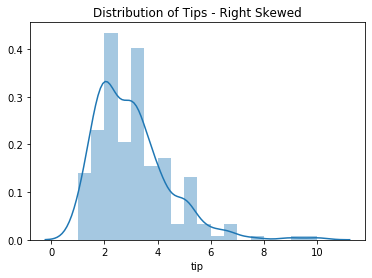

In [18]:
# T-tests assume that the continous variable is normally distributed,
# so we need to do a quick check of this.

sns.distplot(df.tip)
plt.title('Distribution of Tips - Right Skewed')
plt.show()

### Compare mean and median of df.tip

- The distribution is right-skewed, so we see below the mean is slightly higher than the median.

In [21]:
print(f'The mean is: {df.tip.mean()}, and the median is {df.tip.median()}')
print('This is close enough to normal to continue.')

The mean is: 2.9982786885245902, and the median is 2.9
This is close enough to normal to continue.


# Calculate the t-statistic and p-value for a One Sample T-Test by hand

In [26]:
smokers = df[df.smoker == 'Yes']

In [29]:
pop_mean = df.tip.mean()

In [30]:
xbar = smokers.tip.mean()

In [31]:
smokers_standard_dev = smokers.tip.std()

In [32]:
n = smokers.shape[0]

In [33]:
degrees_freedom = n - 1

In [37]:
standard_error = smokers_standard_dev / sqrt(n)

In [39]:
t = (xbar - pop_mean) / (smokers_standard_dev / sqrt(n))

In [40]:
print(f"Our t-statistic for smokers' tips is {t}.")

Our t-statistic for smokers' tips is 0.07177676877620093.


In [44]:
p = stats.t(degrees_freedom).sf(t) * 2

In [49]:
print(f"Our p-value for smokers' tips is {p}")
print(f'This means there is about a {round(p * 100,2)}% chance that we observe the data we have.')

Our p-value for smokers' tips is 0.9429353685499238
This means there is about a 94.29% chance that we observe the data we have.


In [50]:
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.072
p = 0.943


# Calculate the t-statistic and p-value using scipy.stats module

In [51]:
t, p = stats.ttest_1samp(smokers.tip, df.tip.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.072
p = 0.943


## Now THAT is awesome!!!!

# Calculate the t-statistic and p-value for a Two Sample T-Test by hand

In [67]:
males = df[df.sex == 'Male'].tip
females = df[df.sex == 'Female'].tip

In [68]:
males_xbar = males.mean()
females_xbar = females.mean()

In [89]:
males_xbar

3.0896178343949052

In [91]:
females_xbar

2.833448275862069

In [69]:
n_males = males.shape[0]
n_females = females.shape[0]

In [70]:
std_males = males.std()
std_females = females.std()

In [71]:
degrees_freedom = n_males + n_females - 2

In [72]:
s_p = sqrt(((n_males - 1) * std_males + (n_females - 1) * std_females ** 2) / (n_males + n_females - 2))

In [76]:
standard_error = sqrt(std_males ** 2 / n_males + std_females ** 2 / n_females)
standard_error

0.17197939068320425

In [80]:
t = (males_xbar - females_xbar) / (s_p * sqrt(1/n_males + 1/n_females))
print(f'The t-statistic for the two sample t-test comparing male to female tips is {round(t,3)}.')

The t-statistic for the two sample t-test comparing male to female tips is 1.598.


In [87]:
p = stats.t(degrees_freedom).sf(t) * 2
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')


Our p-value is 0.111.
This means there is about a 11.12% chance that we observe the data we have.


### Again, using scipy.stats.ttest_ind()

- For some reason, these didn't match up as well. I trust the stats.ttest_ind() more than what I did by hand here.

In [94]:
t, p = stats.ttest_ind(males, females)

In [96]:
print(f'The t-statistic for the two sample t-test comparing male to female tips is {round(t,3)}.')

The t-statistic for the two sample t-test comparing male to female tips is 1.388.


In [95]:
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')

Our p-value is 0.166.
This means there is about a 16.65% chance that we observe the data we have.


# Exercises

In [98]:
mpg = data('mpg')

In [99]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [102]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
avg_mileage     234 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [100]:
mpg['avg_mileage'] = (mpg['cty'] + mpg['hwy']) / 2

In [101]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5


In [106]:
cars99 = mpg[mpg.year == 1999].avg_mileage
cars99.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mileage, dtype: float64

In [107]:
cars08 = mpg[mpg.year == 2008].avg_mileage
cars08.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mileage, dtype: float64

In [110]:
t, p = stats.ttest_ind(cars99, cars08)
print('t-statistic: ', t)
print('p_value: ', p)

t-statistic:  0.21960177245940962
p_value:  0.8263744040323578


## Are compact cars more fuel-efficient than the average car?


In [114]:
compact = mpg[mpg['class'] == 'compact'].avg_mileage
compact.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mileage, dtype: float64

In [118]:
compact.mean()

24.21276595744681

In [133]:
all_cars_mean = mpg.avg_mileage.mean()
all_cars_mean

20.14957264957265

In [134]:
t, p = stats.ttest_1samp(compact, all_cars_mean)
print(f't-statistic: {round(t, 3)} and p-value is: {round(p,3)}.')

t-statistic: 7.897 and p-value is: 0.0.


- This seems to be where you get the real difference in avg_mileage, not the year so much.

## Do manual cars get better gas mileage than automatic cars?

In [129]:
auto = mpg[mpg.trans.str.startswith('auto')]
auto.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5


In [130]:
manual = mpg[mpg.trans.str.startswith('man')]
manual.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


In [131]:
t, p = stats.ttest_ind(auto.avg_mileage, manual.avg_mileage )

In [132]:
print(f't-statistic: {round(t, 3)} and p-value is: {round(p,3)}.')

t-statistic: -4.593 and p-value is: 0.0.


- Again, having a manual or automatic transmission seems to make a difference in fuel-efficiency.